# **Bioinformatics Project - Computational Drug Discovery [Part 2] : Exploratory Data Analysis**

Hamza Ahmed

---

Here, I will be looking at performing Descriptor Calculation and EDA for the 3C-Proteinase molacule we downloaded in Part 1

### **Install rdkit**

The rdkit tool kit allows you compute the molecular descriptors for the molecules we downloaded in the previous part. Molecular descriptors for a given drug can describe the No. of Hydrogen bonds donors, No. of Hydrogen bonds acceptors the electricalchrges for the atom, conformational flexibility for rotatotable chemical bonds etc. 


In [19]:
# ! conda install -c rdkit rdkit -y

Channels:
 - rdkit
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



### **Import Libraries**

In [20]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Lipinski's Descriptors**

Christopher Lipinski came up with a rule of 5 for calculating the *druglikeness* of compounds. Such druglikeness is based on the `Absoption`, `Distrabition`, `Metabolism`, and `Excretion` (ADME) that is also known as the pharmacokinetic profile. Lipinski analysed all orally active FDA-approved drugs in the formulation of what is to be known as the *Rule of 5* or *Lipinski's rule*

The Rule of 5 are: 
- Molecular weight < 500 Dalton
- Octanol-water partition coefficiant (LogP) < 5
- Hydrogen bond donors < 5 (The number of N-H and O-H bonds)
- Hydrogen bond acceptors <  10 (The number of N and O bonds)

In [21]:
df = pd.read_csv('data/3C-proteinase_processed_date.csv')

### **Calculate descriptors**

In [22]:
""" 
Here  we define a custome function which takes in the smiles 
notation (the chemical structuer of the compounds) and returns a dataframe of Lipinski's rule of 5 descriptors
"""

def lipinski(smiles, verbose=False):
    
    #Extract the individual elements of each molacule 
    moldata = []
    for element in smiles: 
        mol = Chem.MolFromSmiles(element)
        moldata.append(mol)
        if verbose:
            print(f"Processed SMILES: {element}")
    
    # Create an empty NumPy array 
    baseData = np.array([])
    #initalise counter for each molacule
    i=0
    for mol in moldata:
        
        mol_wt = Descriptors.MolWt(mol)
        mol_wt = round(mol_wt, 3)
        mol_logP = Descriptors.MolLogP(mol)
        mol_logP = round(mol_logP, 3)
        mol_NumHDonors = Lipinski.NumHDonors(mol)
        mol_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        if verbose: 
            print(f"Descriptors for molecule {i}: MW = {mol_wt}, LogP = {mol_logP}, NumHDonors = {mol_NumHDonors}, NumHAcceptors = {mol_NumHAcceptors}")
        
        # define the row for the data frame:
        row = np.array([mol_wt, mol_logP, mol_NumHDonors, mol_NumHAcceptors])
        
        # Create stacked rows of descriptors
        if (i==0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i += 1 
        
    # create the data frame: 
    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors_df = pd.DataFrame(data=baseData, columns=columnNames)
    
    return descriptors_df

In [23]:
df_lipinski_descriptors = lipinski(df.cannonical_smiles, False)
df_lipinski_descriptors

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.893,0.0,5.0
1,415.589,3.813,0.0,2.0
2,421.190,2.661,0.0,4.0
3,293.347,3.631,0.0,3.0
4,338.344,3.539,0.0,5.0
...,...,...,...,...
128,338.359,3.401,0.0,5.0
129,296.366,3.443,0.0,3.0
130,276.291,4.096,0.0,3.0
131,278.307,3.291,0.0,3.0


In [24]:
df

,mol_id,cannonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


**Combine Data Sets**
<br>
<br>
We have two data sets: df (The processed data from part 1) df_lipinski_descriptors (containing the lipinski descriptors for each molacule)

Lets combine the two data sets

In [25]:
# The two different data sets contain different information so we are concating using axis=1
df_combined = pd.concat([df, df_lipinski_descriptors], axis=1)

In [26]:
df_combined

,mol_id,cannonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.893,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.813,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.661,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.631,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.539,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.401,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.443,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.096,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.291,0.0,3.0


### **Convert IC50 to pIC50**

To allow the *IC50* data to be more uniformaly distributed, we will convert *IC50* to the negative logarithmic scale which is essentially  *-log10(IC50)*

This custom function takes a DataFrame as input and then: 
- Takes the IC50 from the standard values column and convert it from nM to M by multiplying the value by $10^{-9}$
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column

In [27]:
def cal_pIC50(data):
    
    pIC50 = []
    
    for i in data['standard_value_norm']:
        #concert to mM:
        molar = i*(10**-9)
        # -log10(IC50)
        pIC50_val = round(-np.log10(molar), 3)
        pIC50.append(pIC50_val)
    
    # Add the calculated pIC50 data to the DataFrame
    data['pIC50'] = pIC50
    # drop the previous IC50 values
    x = data.drop('standard_value_norm', axis='columns')
    
    
    return x
        

----
**Seeing the distrabity of standard IC50 values vs pIC50**

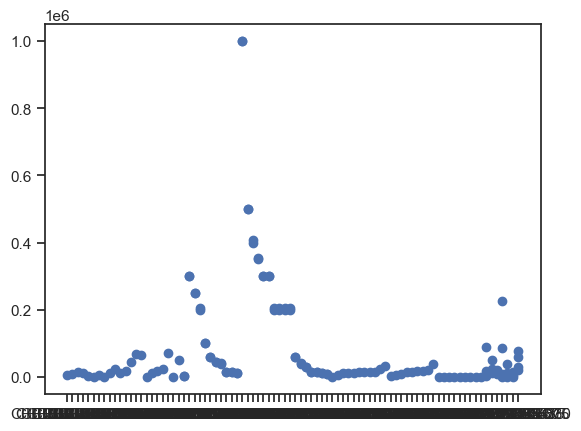

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x=df_combined['mol_id'], y=df_combined['standard_value'])
plt.show()

----

Note: We need to make sure the  standard_values greater than 100,000,000 will be fixed at 100,000,000 otherwise these values will be negative when we convert them to pIC50 values. This is called normalisation

In [29]:
# Lets see if there are values greater than 100,000,000
df_combined.standard_value.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [30]:
# Normalise the standard values: 
def norm_values(data):
    
    norm = []
    
    for i in data['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
        
    data['standard_value_norm'] = norm
    x = data.drop('standard_value', axis='columns')
    
    
    return x

### **Create the Final processed data**

Overview: 
- We normalised the data; by converting all values above 100,000,000 
- We then converted all the IC50 to pIC50 values:

In [31]:
df_norm = norm_values(df_combined)

In [32]:
df_final = cal_pIC50(df_norm)

In [33]:
df_final

,mol_id,cannonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.893,0.0,5.0,5.143
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.813,0.0,2.0,5.027
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.661,0.0,4.0,4.870
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.631,0.0,3.0,4.882
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.539,0.0,5.0,5.699
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.401,0.0,5.0,4.975
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.443,0.0,3.0,4.996
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.096,0.0,3.0,4.939
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.291,0.0,3.0,4.971


To make ease for comparision let's delete the intermediate class from the dataset

In [34]:
substring = "intermediate"
removed = df_final['bioactivity_class'].str.contains(substring)
df_2Class = df_final[~removed]
        

In [35]:
# With intermediate bioactivity class
df_final

,mol_id,cannonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.893,0.0,5.0,5.143
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.813,0.0,2.0,5.027
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.661,0.0,4.0,4.870
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.631,0.0,3.0,4.882
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.539,0.0,5.0,5.699
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.401,0.0,5.0,4.975
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.443,0.0,3.0,4.996
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.096,0.0,3.0,4.939
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.291,0.0,3.0,4.971


In [36]:
# Intermediate Bioactivity class removed
df_2Class

,mol_id,cannonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.661,0.0,4.0,4.870
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.631,0.0,3.0,4.882
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.393,0.0,3.0,6.009
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.235,0.0,3.0,6.022
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.284,0.0,3.0,4.951
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.401,0.0,5.0,4.975
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.443,0.0,3.0,4.996
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.096,0.0,3.0,4.939
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.291,0.0,3.0,4.971


In [37]:
df_2Class.to_csv('data/df_2Class.csv', index=False)

----

## **Expliratory Data Analysis**

Here we will be exploring a *chemical space analysis* via the *Lipinski's descriptors* 


### **Import Libraries**

In [38]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency Plots of the two Bioactivity Classes**


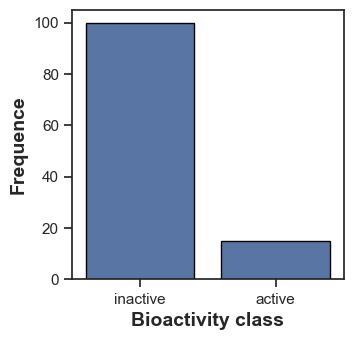

In [39]:
plt.figure(figsize=(3.5, 3.5))

# Create a frequency plot: 
sns.countplot(x='bioactivity_class', data=df_2Class, edgecolor='black')

# Set Lables:
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequence', fontsize=14, fontweight='bold')

# save the frequency plot: 
plt.savefig('data/bioactivity_frequencyplot.pdf')

### **Scatter Plot of MW vs LogP**

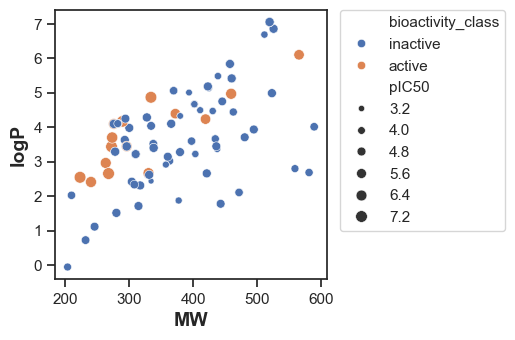

In [40]:
plt.figure(figsize=(3.5, 3.5))

# Draw a scatter plot where the color of each point is dictated by the bioactivity class, the size by the pIC50
sns.scatterplot(x='MW', y='LogP', data=df_2Class, hue='bioactivity_class', size='pIC50', edgecolor='white', alpha=1) # alpha is the transparency of the dots, 1 is opaque, 0 is complteley transparent

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('logP', fontsize=14, fontweight='bold')

# bbox_to_anchor is used to position the legend box, 
# borderaxespad is the padding between the legend and the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Save the scatter plot:
plt.savefig('data/Mw_LogP_scatter.pdf')


### **Box Plots**

**Comparing Bioactivity with pIC50 values**

(higher pIC50 will be more potent)

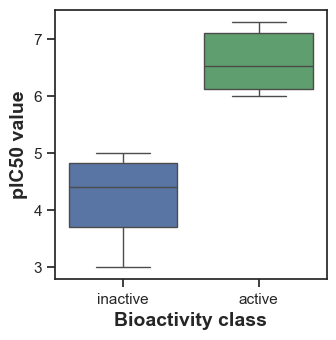

In [41]:
plt.figure(figsize=(3.5,3.5))

palette = ['b', 'g']
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2Class, hue='bioactivity_class', palette=palette, legend=False)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

# Save the Box plot
plt.savefig('data/bioactivity_pIC50_box.pdf')

### **Statistical Analysis using Mann-Whitney U test**

In [42]:
def mannwhitney(descriptor, data, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    # seed the random number generator: 
    seed(1)
    
    # activate and inactive:
    selection = [descriptor, 'bioactivity_class']
    df = data[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]
    
    # compare samples:
    stat, p = mannwhitneyu(active, inactive)
    if verbose:
        print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    
    # interpret: 
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject Null Hypothesis)'
    else:
        interpretation = 'Different distribution (reject Null Hypothesis)'
    
    results = pd.DataFrame({'Descriptor': descriptor,
                            'Statistic': stat,
                            'p_value': p,
                            'alpha value': alpha,
                            'Interpretation': interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    
    return results
    
    

**For pIC50:**

In [72]:
mann_pIC50 = mannwhitney('pIC50', df_2Class, True)

Statistics=1500.000, p=0.000


**For MW**

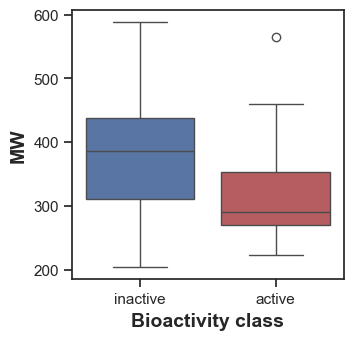

In [53]:
plt.figure(figsize=(3.5,3.5))

palette = ['b', 'r']
sns.boxplot(x='bioactivity_class', y='MW', data=df_2Class, hue='bioactivity_class', palette=palette, legend=False)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
 
plt.savefig('data/Images/MW_box.pdf')

In [65]:
mann_MW = mannwhitney('MW', df_2Class)

**For LogP**

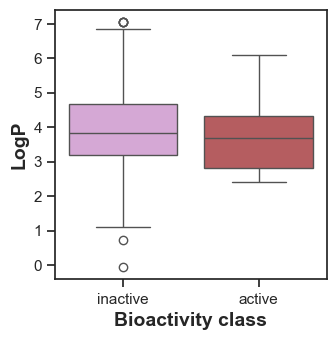

In [54]:
plt.figure(figsize=(3.5,3.5))

palette = ['plum', 'r']
sns.boxplot(x='bioactivity_class', y='LogP', data= df_2Class, hue='bioactivity_class', palette=palette)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('data/Images/LogP_box.pdf')


In [61]:
mann_logP = mannwhitney('LogP', df_2Class)

**For NumHDonors**

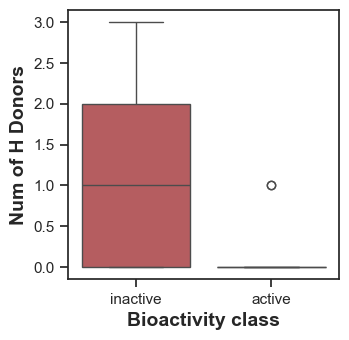

In [56]:
plt.figure(figsize=(3.5,3.5))

palette = ['r', 'b']
sns.boxplot(x='bioactivity_class', y='NumHDonors', data= df_2Class, hue='bioactivity_class', palette=palette)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Num of H Donors', fontsize=14, fontweight='bold')

plt.savefig('data/Images/NumHDonors_box.pdf')

In [63]:
mann_NumHDonors = mannwhitney('NumHDonors', df_2Class)

**For NumHAcceptors**

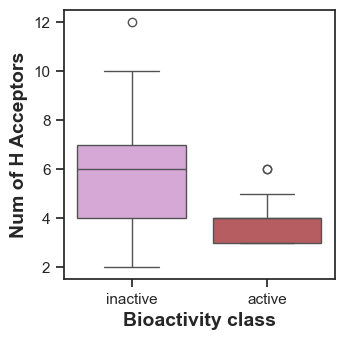

In [58]:
plt.figure(figsize=(3.5,3.5))

palette = ['plum', 'r']
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data= df_2Class, hue='bioactivity_class', palette=palette)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Num of H Acceptors', fontsize=14, fontweight='bold')

plt.savefig('data/Images/NumHAcceptors_box.pdf')

In [64]:
mann_NumHAcceptors = mannwhitney('NumHAcceptors', df_2Class)

In [73]:
## Combine the data Frames for the various Mann_Whitney tests preformed:

list_df = [mann_MW, mann_pIC50, mann_logP, mann_NumHDonors, mann_NumHAcceptors]
mann_df = pd.concat(list_df, axis=0)

In [79]:
mann_df.to_csv('data/MannU_descriptors.csv', index=False)

In [78]:
mann_df

,Descriptor,Statistic,p_value,alpha value,Interpretation
0,MW,402.5,3.950001e-03,0.05,Different distribution (reject Null Hypothesis)
0,pIC50,1500.0,4.798746e-10,0.05,Different distribution (reject Null Hypothesis)
0,LogP,704.5,7.085807e-01,0.05,Same distribution (fail to reject Null Hypothe...
0,NumHDonors,296.5,6.946295e-05,0.05,Different distribution (reject Null Hypothesis)
0,NumHAcceptors,411.5,4.450604e-03,0.05,Different distribution (reject Null Hypothesis)


Of the 4 Lipinskis's Descriptors, 3 (MW, NumHDonors, NumHAcceptors) showed significance difference btween the active and inactive states of the drug 

In [ ]:
! zip -r data.zip . -i data/*.csv

In [ ]:
! zip -r images.zip . -i data/Images/*.pdf

In [ ]:
! zip -r results.zip . -i data.zip images.zip

In [83]:
! rm -f images.zip data.zip